In [5]:
#Obviously
import numpy as np
import pandas as pd
#plotting
import matplotlib.pyplot as plt
import seaborn as sns
#comp. resource tracing
import tracemalloc
import time 

#CIFAR-10 dataset, coloured images
import pickle
from keras.datasets import cifar10

#Classifiers and methods
from sklearn import svm,metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score 

# CIFAR-10

In [6]:
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# X_train is 50000 rows of 3x32x32 values --> reshaped in 50000 x 3072
RESHAPED = 3072

X_train = X_train.reshape(50000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

y_train = y_train.flatten()
y_test = y_test.flatten()

# normalize the datasets
X_train /= 255.
X_test /= 255.

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 13s 0us/step
50000 train samples
10000 test samples


# Fashion-MNIST

In [32]:
#Already normalized and reshaped
train = np.loadtxt("MNIST_data/fashion_train.csv",delimiter=",")
test =  np.loadtxt("MNIST_data/fashion_test.csv",delimiter=",")

X_train, y_train = train[:,1:], train[:,0]
X_test, y_test = test[:,1:], test[:,0]

# Random Forest

In [7]:
# fit a RandomForest model to the data

#best parameters found online
best_par = {'criterion': 'gini',
'max_depth': 10,
'max_features': 'auto',
'min_samples_leaf': 10}


model = RandomForestClassifier(n_estimators = 10, criterion = best_par["criterion"],
                              max_depth = best_par["max_depth"], max_features = best_par["max_features"],
                              min_samples_leaf = best_par["min_samples_leaf"])

#cv_results = cross_val_score(model, X_train, y_train, 
                             #cv = 2, scoring='accuracy', 
                             #n_jobs = -1, verbose = 1)    

model.fit(X_train, y_train)
print(); print(model)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [ ]:
model.best


              precision    recall  f1-score   support

           0       0.49      0.50      0.49      1000
           1       0.43      0.45      0.44      1000
           2       0.33      0.18      0.23      1000
           3       0.27      0.17      0.21      1000
           4       0.31      0.38      0.34      1000
           5       0.35      0.33      0.34      1000
           6       0.37      0.50      0.43      1000
           7       0.39      0.36      0.38      1000
           8       0.50      0.55      0.52      1000
           9       0.40      0.48      0.44      1000

    accuracy                           0.39     10000
   macro avg       0.38      0.39      0.38     10000
weighted avg       0.38      0.39      0.38     10000


[[497  45  40  21  43  32  32  35 189  66]
 [ 34 445  13  43  21  46  66  46  85 201]
 [100  54 177  72 218  70 150  78  42  39]
 [ 65  53  58 172 105 171 177  86  29  84]
 [ 54  30  84  50 382  61 197  85  28  29]
 [ 41  41  67 122 116 33

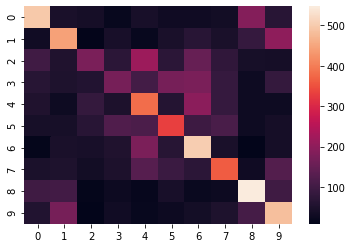

In [8]:
# make predictions
expected_y  = y_test
predicted_y = model.predict(X_test)

# summarize the fit of the model
print(); print(metrics.classification_report(expected_y, predicted_y))
print(); print(metrics.confusion_matrix(expected_y, predicted_y))
sns.heatmap(metrics.confusion_matrix(expected_y, predicted_y))